### i) Read the data from the file “people.txt”.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

# Reading people.txt
f = pd.read_csv("./data/people.txt")

### ii) Create a ruleset E that contain rules to check for the following conditions:
1. The age should be in the range 0-150.
2. The age should be greater than years married.
3. The status should be married or single or widowed.
4. If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.

In [6]:
f

Age agegroup  height   status  yearsmarried
0   21    adult     6.0   single            -1
1    2    child     3.0  married             0
2   18    adult     5.7  married            20
3  221  elderly     5.0  widowed             2
4   34    child    -7.0  married             3

In [9]:
f.index

RangeIndex(start=0, stop=5, step=1)

In [8]:
len(f)

5

In [11]:
# age should be in the range 0-150
def check_age_range(f):
    age_range = lambda r : r in range(151)
    print(f["Age"].apply(age_range))
        
check_age_range(f)

0     True
1     True
2     True
3    False
4     True
Name: Age, dtype: bool


In [14]:
#  age should be greater than years married
def check_age(f) :
    age_check = lambda r : r[0] > r[1]
    print(f[["Age","yearsmarried"]].apply(age_check,axis=1))
    
check_age(f)

0     True
1     True
2    False
3     True
4     True
dtype: bool


In [17]:
# status should be married or single or widowed
def check_status(f) :
    status=set(f.status)
    status_check = lambda r : r in status
    print(f["status"].apply(status_check))
    
check_status(f)

0    True
1    True
2    True
3    True
4    True
Name: status, dtype: bool


In [27]:
# age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult,
# if age is more than 65 the agegroup should be elderly
def check_group(f) :
    def group_check(x) :
        if (x[0] in range(18) and x[1]=="child") or (x[0] in range(18,66) and x[1]=="adult") or (x[0]>65 and x[1]=="elderly")  :
            return True
        else :
            return False

    print(f[["Age","agegroup"]].apply(group_check,axis=1))
    
check_group(f)

0     True
1     True
2     True
3     True
4    False
dtype: bool


### Check whether ruleset E is violated by the data in the file people.txt.

In [28]:
E = {"check_age_range" : check_age_range, "check_age" : check_age, "check_status": check_status, "check_group" : check_group}

In [34]:
# Check Age Range
E["check_age_range"](f)

0     True
1     True
2     True
3    False
4     True
Name: Age, dtype: bool


In [35]:
# Check Age
E["check_age"](f)

0     True
1     True
2    False
3     True
4     True
dtype: bool


In [36]:
# Check Status
E["check_age"](f)

0     True
1     True
2    False
3     True
4     True
dtype: bool


In [37]:
# Check Group
E["check_age"](f)

0     True
1     True
2    False
3     True
4     True
dtype: bool


### Summarize the results obtained in part (iii)

In [63]:
f.describe()

Age   height  yearsmarried
count    5.000000  5.00000      5.000000
mean    59.200000  2.54000      4.800000
std     91.163041  5.45967      8.642916
min      2.000000 -7.00000     -1.000000
25%     18.000000  3.00000      0.000000
50%     21.000000  5.00000      2.000000
75%     34.000000  5.70000      3.000000
max    221.000000  6.00000     20.000000

### Visualize the results obtained in part (iii)

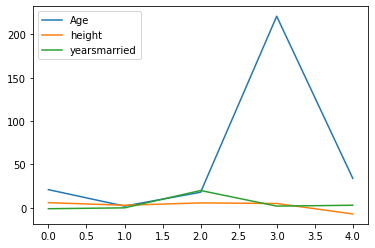

In [60]:
x = f.plot()